# Decison Tree

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree 

In [52]:
data = pd.read_csv(r'Social_Network_Ads.csv')
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [53]:
y=data.iloc[:,2].values 
x=data.iloc[:,:2].values

columns = list(data.columns)
columns

['Age', 'EstimatedSalary', 'Purchased']

confusion matrix:
[[53  5]
 [ 3 19]]
accuracy: 0.9


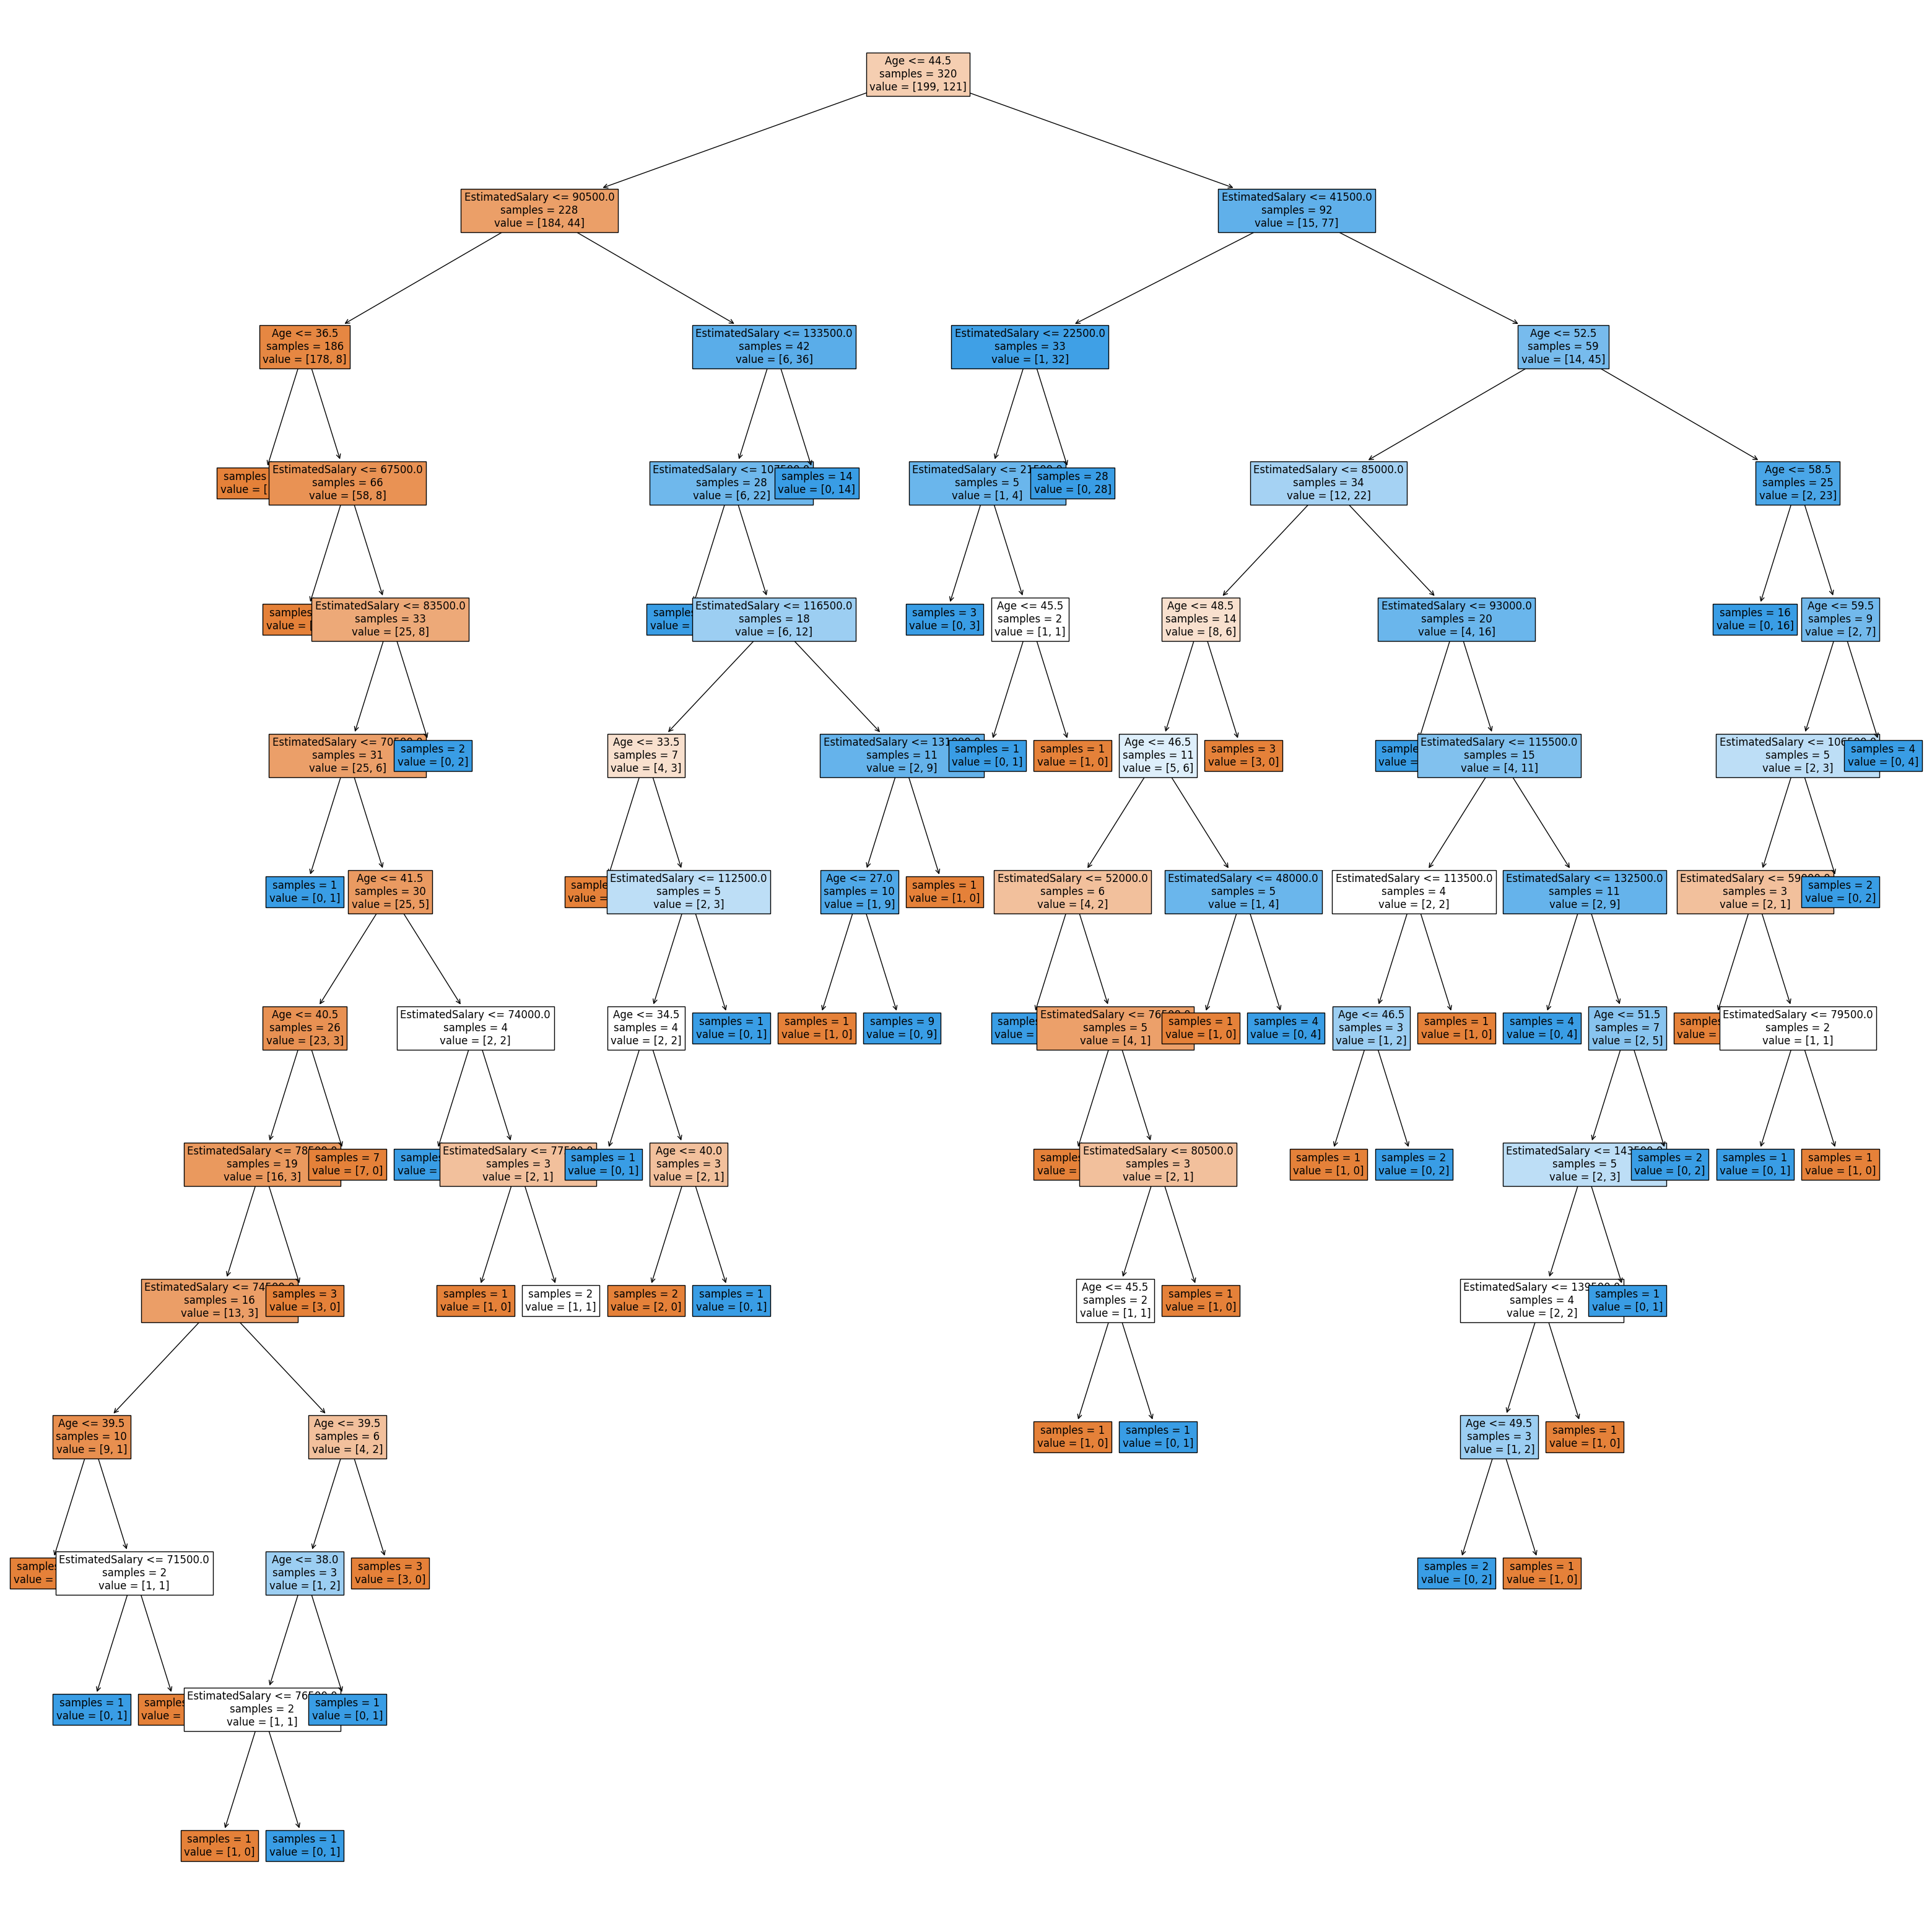

In [54]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train) 
X_test_scaled = sc.transform(X_test)


classifier = DecisionTreeClassifier(criterion='entropy',random_state=1) 
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)



cm = confusion_matrix(y_test,y_pred) 
print("confusion matrix:")
print(cm)
print(f"accuracy: {accuracy_score(y_test,y_pred)}")


plt.figure(figsize=(40,40)) 
plot_tree(classifier, feature_names=columns, impurity=False, filled=True,fontsize=12)
plt.show()

In [55]:
classifier1=DecisionTreeClassifier(criterion='gini',random_state=1) 
classifier1.fit(X_train,y_train)
y_pred_gini=classifier1.predict(X_test)


cm_gini=confusion_matrix(y_test,y_pred_gini) 
cm_gini,accuracy_score(y_test,y_pred_gini)

(array([[54,  4],
        [ 3, 19]], dtype=int64),
 0.9125)

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier 

classifier2=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1) 
classifier2.fit(X_train,y_train)

y_pred_10=classifier2.predict(X_test)
cm_gini=confusion_matrix(y_test,y_pred_10) 
cm_gini,accuracy_score(y_test,y_pred_10)


classifier3=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=1) 
classifier3.fit(X_train,y_train)
y_pred_100=classifier3.predict(X_test)
 
cm_gini=confusion_matrix(y_test,y_pred_100) 
cm_gini,accuracy_score(y_test,y_pred_100)



(array([[54,  4],
        [ 3, 19]], dtype=int64),
 0.9125)